In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salesdaily.csv')

In [3]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [5]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5.033683,3.895830,3.880441,29.917095,8.853627,0.593522,5.512262,2.900198,2016.401235,6.344255,275.945869
std,2.737579,2.133337,2.384010,15.590966,5.605605,1.092988,6.428736,2.415816,1.665060,3.386954,1.970547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,190.000000
25%,3.000000,2.340000,2.000000,19.000000,5.000000,0.000000,1.000000,1.000000,2015.000000,3.000000,276.000000
50%,4.990000,3.670000,3.500000,26.900000,8.000000,0.000000,4.000000,2.000000,2016.000000,6.000000,276.000000
75%,6.670000,5.138000,5.200000,38.300000,12.000000,1.000000,8.000000,4.000000,2018.000000,9.000000,276.000000
max,17.340000,14.463000,16.000000,161.000000,54.833333,9.000000,45.000000,15.000000,2019.000000,12.000000,276.000000


## Distributions and Box Plots

In [42]:
# create a list of just the numerical features from the data set
numerical_features = df.columns.tolist()[1:9]

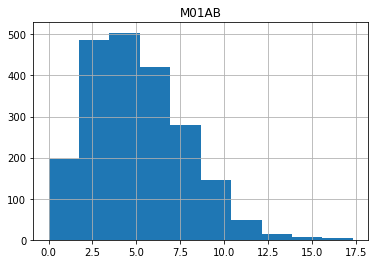

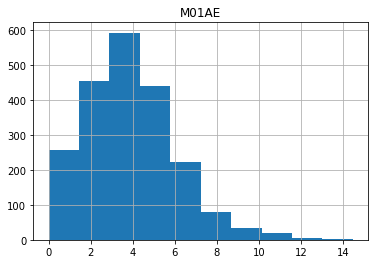

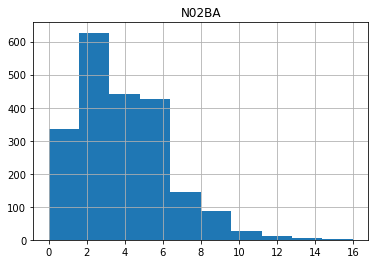

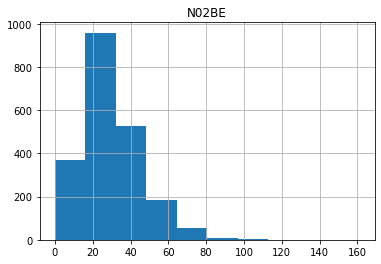

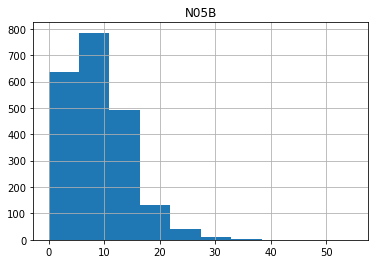

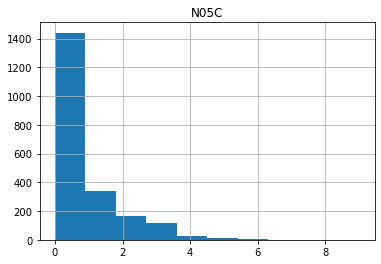

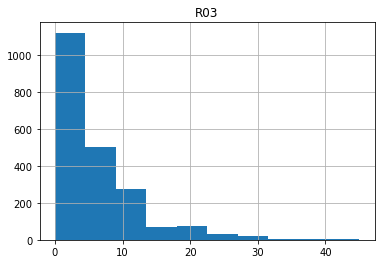

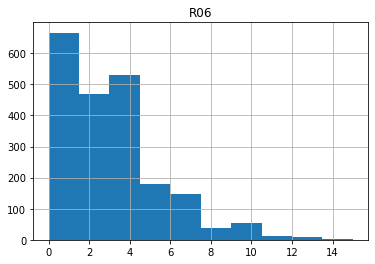

In [43]:
# plot the distribution of each numerical feature
for cat in numerical_features:
    df[cat].hist()
    plt.title(cat)
    plt.show()

Here we can see that the distributions of these features are skewed right

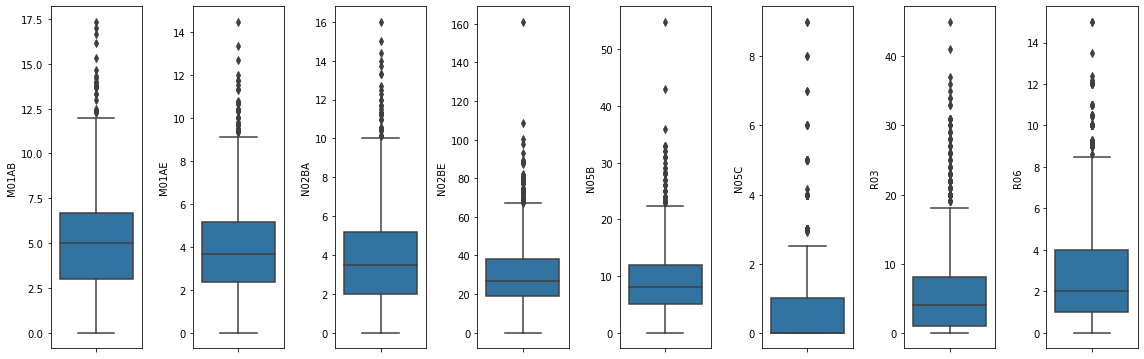

In [44]:
# extract the number of columns and set up fig size
num_cols = len(numerical_features)
plt.figure(figsize=(2*num_cols,10))

# plot box plot for each numerical feature
for cat in range(num_cols):
    plt.subplot(2,num_cols,cat+1)
    sns.boxplot(df[numerical_features[cat]], orient='v')
    plt.tight_layout()

These box plots further show us that the distributions are skewed right

## Correlations

<AxesSubplot:>

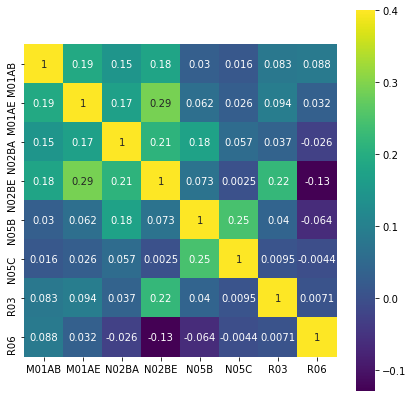

In [55]:
corr = df[numerical_features].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, square=True,cmap='viridis', vmax=0.4)

The correlation matrix above shows that most features are very weakly correlated with each other. There is a slight correlation between M01AE and N02BE; N05C and N05B; and R03 and N02BE. However, I don't think they are strong enough to remove any features from our model.

## Seasonality, Trend, Stationarity, and Autocorrelation Analysis
An important step in time series forecasting is to analyze the seasonality, trend, and stationairty of the data.

### Seasonality
We will start first by exploring seasonality. But what is seasonality? 
- A series of occurrences with specific repetitive intervals (e.g. daily, monthly, yearly). If we find seasonality, we need to account for the seasonal component when building our model(s) to improve performance.

We will use a two methods to detect seasonality in the data.
1. Box Plots
2. Rolling Window Means

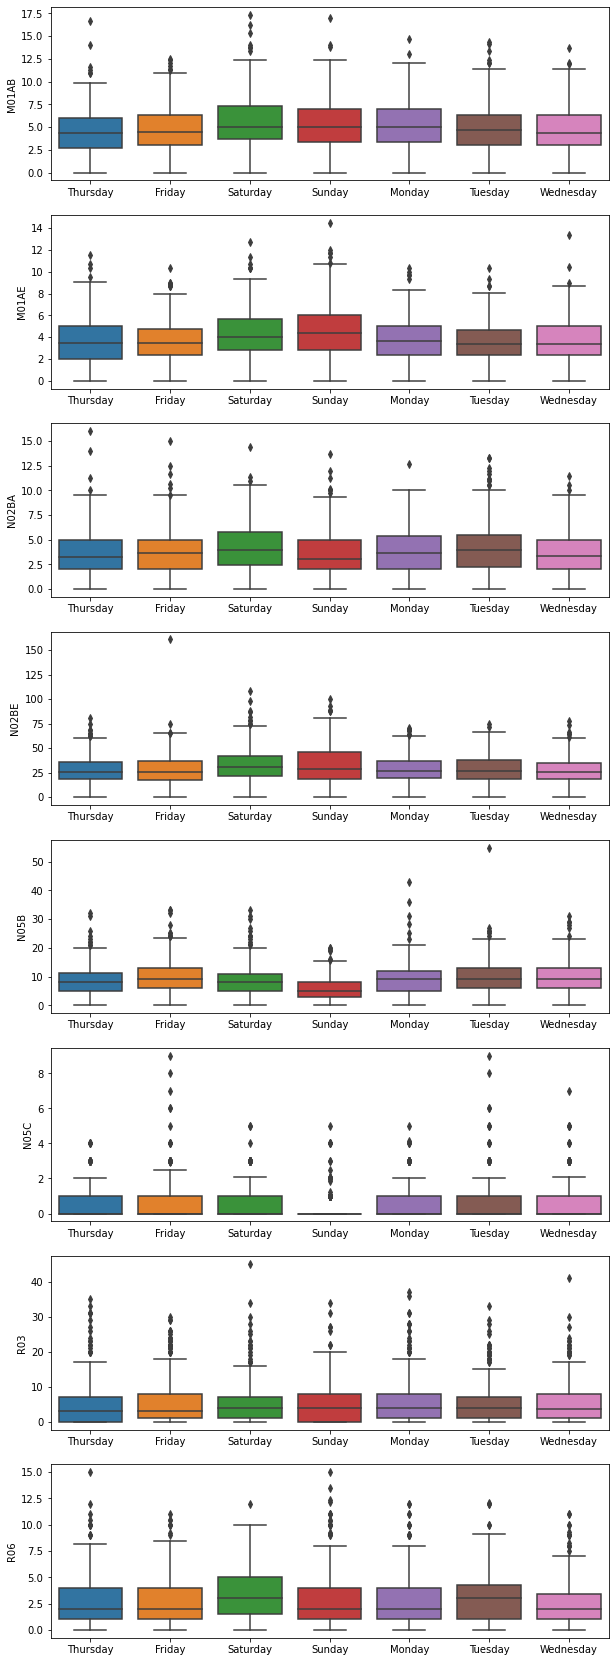

In [67]:
# create box plots by day of week
f, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=False)
for cat, ax in zip(numerical_features, axes):
    sns.boxplot(data=df, x='Weekday Name', y=cat, ax=ax)
    ax.set_xlabel(None)

We can see some light weekly seasonality in these plots.

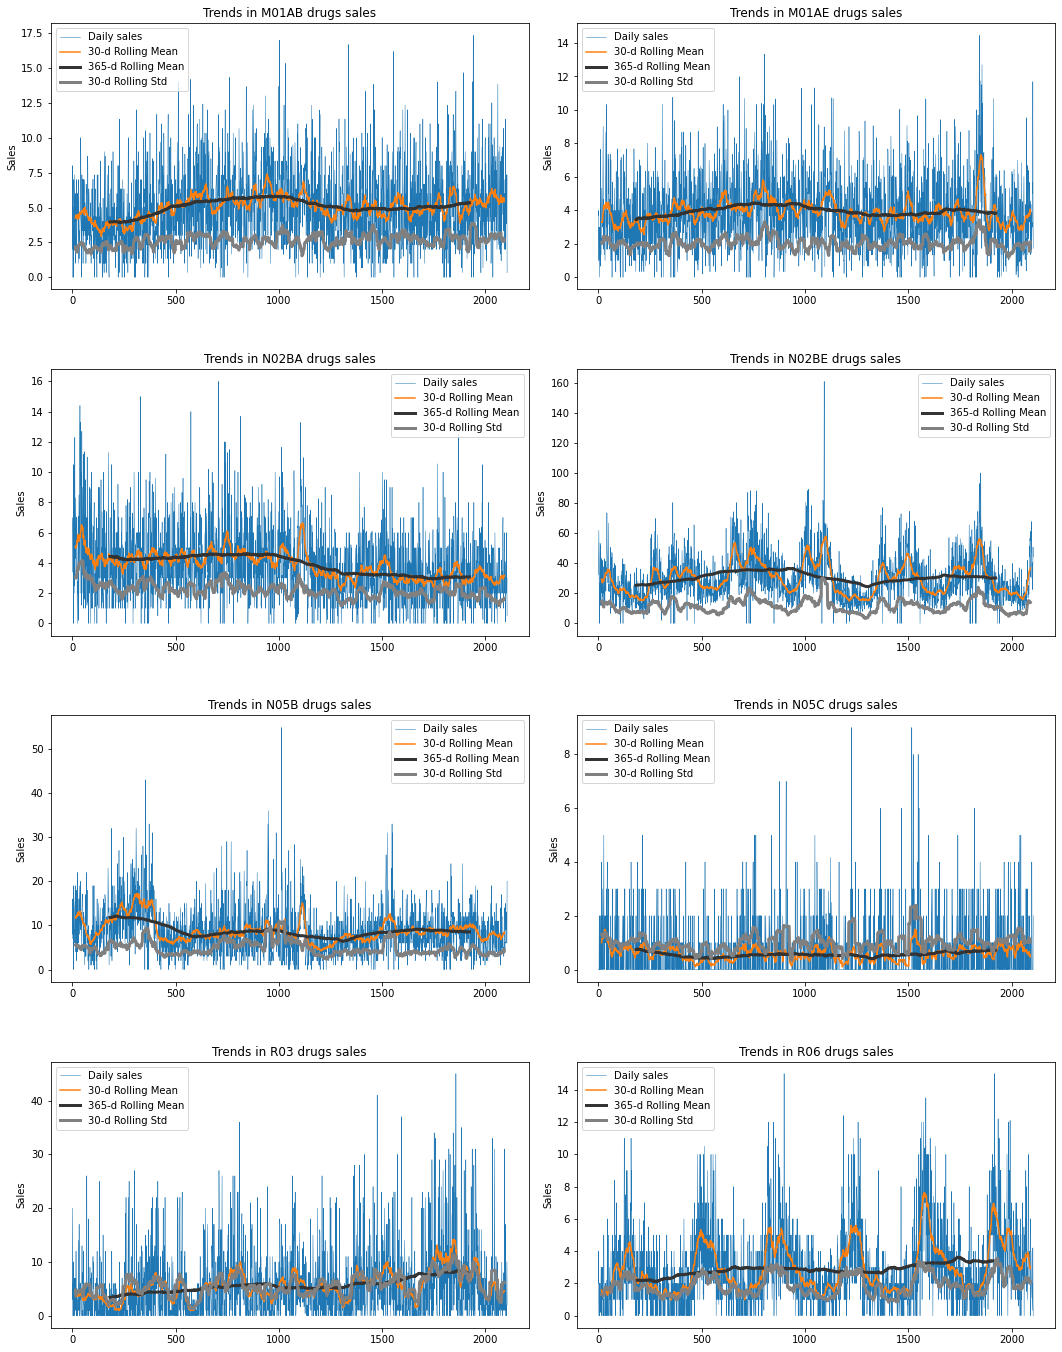

In [73]:
# create moving average

# import math library
import math

# create dataframes for 365-day and 30-day windows and a df of 30-day standard deviations
df_365 = df[numerical_features].rolling(window=365, center=True).mean()
df_30 = df[numerical_features].rolling(30, center=True).mean()
df_std = df[numerical_features].rolling(30, center=True).std()
subplotindex=0
fig, ax = plt.subplots(4, 2, figsize=(18, 24))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# plot
for x in numerical_features:
    rowindex=math.floor(subplotindex/2)
    colindex=subplotindex-(rowindex*2)
    
    ax[rowindex,colindex].plot(df.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(df_30.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(df_365.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(df_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' drugs sales');   
    subplotindex=subplotindex+1
    
plt.show()

### Trend
Next we'll take a look at trend.  
- Trend can be thought of as the long-term movement in one direction (i.e. the overall direction of the data as time increases)

We will explore this by plotting the 365-day rolling average means

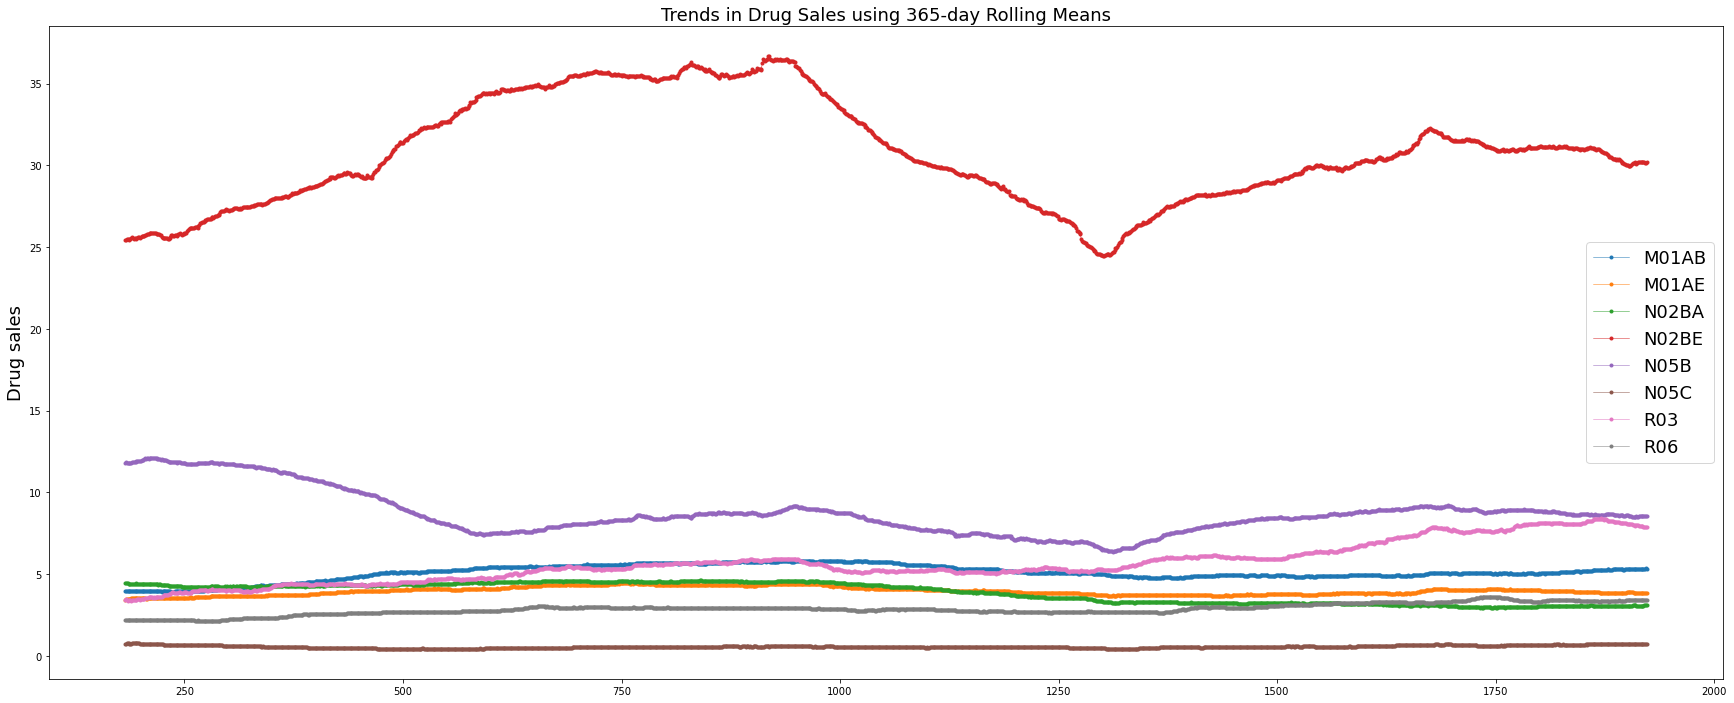

In [89]:
f, axes = plt.subplots(figsize=(30, 12))
for x in numerical_features:
    axes.plot(df_365[x], label=x, marker='.', linestyle='-', linewidth=0.5)
    axes.legend(fontsize=18)
    axes.set_ylabel('Drug sales', fontsize=18)
    axes.set_title('Trends in Drug Sales using 365-day Rolling Means', fontsize=18);

### Stationarity
Now we'll look at stationarity.
- Stationarity means that the statistical properties of a process generating a time series do not change over time. In other words, for a time series to be stationary, its mean, variance, and covariance of the ith term and the (i + m)th term must not be a function of time.

We will explore this by using an Augmented Dickey-Fuller test for each feature. The output of this test will give us a p-value and we will check it against a 95% confidence interval. Therefore, we are checking for p <= 0.05.

*Note: We will be using the weekly aggregated data set that was also provided.*

In [90]:
df_wk=pd.read_csv('salesweekly.csv')

In [104]:
from statsmodels.tsa.stattools import adfuller

for cat in numerical_features:
    dftest = adfuller(df_wk[cat], regression='ct', autolag='AIC')
    print("ADF test for "+cat)
    print("P-value = {:.3f}".format(dftest[1]))
    print("The data is{}stationary with 95% confidence".format(" not " if dftest[4]['5%']<dftest[0] else " "))
    print("-----------------------------")

ADF test for M01AB
P-value = 0.022
The data is stationary with 95% confidence
-----------------------------
ADF test for M01AE
P-value = 0.000
The data is stationary with 95% confidence
-----------------------------
ADF test for N02BA
P-value = 0.249
The data is not stationary with 95% confidence
-----------------------------
ADF test for N02BE
P-value = 0.003
The data is stationary with 95% confidence
-----------------------------
ADF test for N05B
P-value = 0.018
The data is stationary with 95% confidence
-----------------------------
ADF test for N05C
P-value = 0.000
The data is stationary with 95% confidence
-----------------------------
ADF test for R03
P-value = 0.016
The data is stationary with 95% confidence
-----------------------------
ADF test for R06
P-value = 0.000
The data is stationary with 95% confidence
-----------------------------


We can see from the ADF tests that all features except N02BA are stationary (at the 95% confidence level).

### Autocorrelation
Lastly we'll check on autocorrelation of the data.
- Autocorrelation is the similarity between observations as a function of the time lag between them.

We will explore this by using two plotting methodologies:
1. Autocorrelation Plot
2. Partial Autocorrelation Plot

*Note: We will again be using the weekly aggregated data.*

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

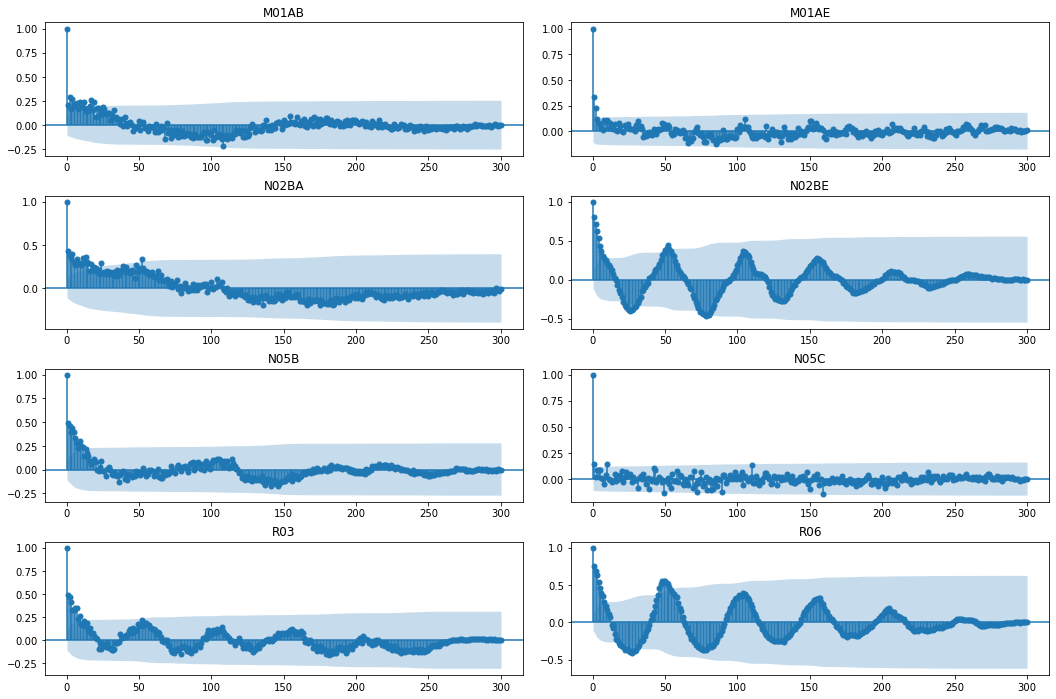

In [109]:
#autocorrelation plot
subplotindex=0
f, axes = plt.subplots(4, 2, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for cat in numerical_features:
        rowindex=math.floor(subplotindex/2)
        colindex=subplotindex-(rowindex*2)
        plot_acf(df_wk[cat], lags=300, title=cat, ax=axes[rowindex,colindex])
        subplotindex=subplotindex+1

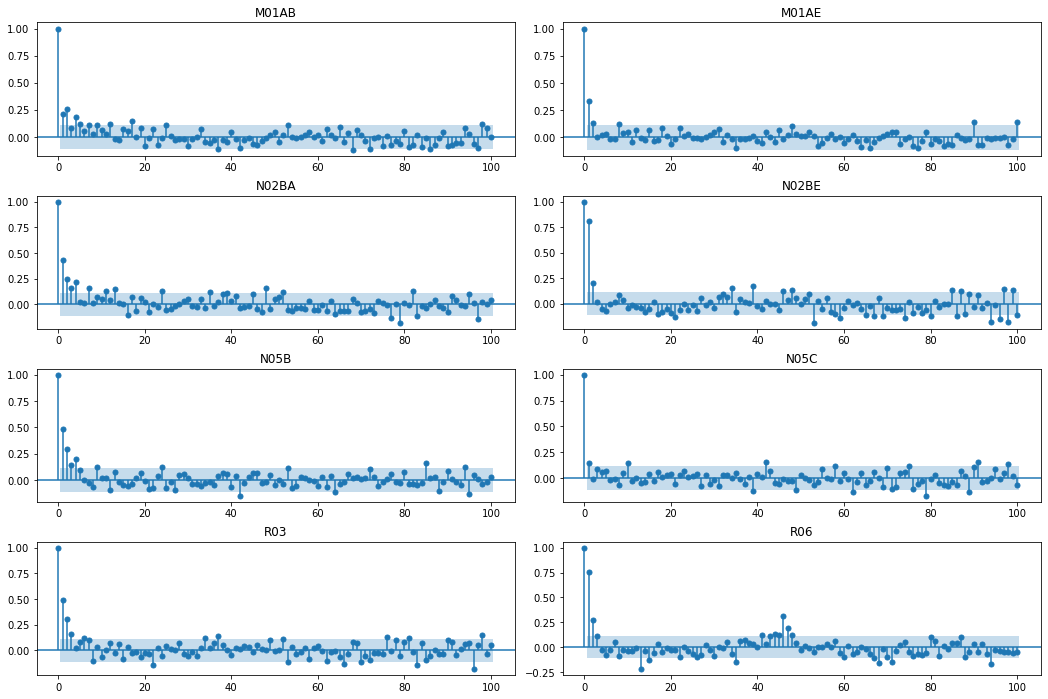

In [108]:
# partial autocorrelation plots
subplotindex=0
f, axes = plt.subplots(4, 2, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for cat in numerical_features:
        rowindex=math.floor(subplotindex/2)
        colindex=subplotindex-(rowindex*2)
        plot_pacf(df_wk[cat], lags=100, title=cat, ax=axes[rowindex,colindex])
        subplotindex=subplotindex+1

From these plots we can see minor instances of autocorrelation for most features. 